# 순서
* store = pd.merge([features, store])
* store 전처리
* train.merge(store)
* test.merge(store)
* X, y split
* Model.fit(X_train, y_train)
* Model.predict(X_test)
* submit

# load data & library

In [811]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [812]:
train = pd.read_csv("../data/MiniP4/train.csv.zip")
print(train.shape)
train.head()

(421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [813]:
test = pd.read_csv("../data/MiniP4/test.csv.zip")
print(test.shape)
test.head()

(115064, 4)


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [814]:
store1 = pd.read_csv("../data/MiniP4/features.csv.zip")
print(store1.shape)
store1.head()

(8190, 12)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [815]:
store2 = pd.read_csv("../data/MiniP4/stores.csv")
print(store2.shape)
store2.head()

(45, 3)


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


# features = pd.merge([features, store])

In [816]:
store = pd.merge(left=store1, right=store2, on="Store")
print(store.shape)
store.sample(5)

(8190, 14)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
2281,13,2011-12-16,27.85,3.282,3272.56,556.15,959.55,424.43,5933.01,129.898065,6.392,False,A,219622
7508,42,2010-12-24,57.06,3.236,NaN,NaN,NaN,NaN,NaN,126.983581,9.003,False,C,39690
5544,31,2011-09-16,80.62,3.526,NaN,NaN,NaN,NaN,NaN,215.694438,7.852,False,A,203750
1136,7,2010-12-10,24.24,2.728,NaN,NaN,NaN,NaN,NaN,190.974107,9.137,False,B,70713
2952,17,2010-11-12,36.32,2.831,NaN,NaN,NaN,NaN,NaN,126.546161,6.885,False,B,93188


## "Date" 날짜 타입으로 변경, 연도, 월 추출
* 1주일에 1번 매주 같은 요일에 측정된 데이터로, 일과 요일 추출은 무의미하다 판단 
* 나중에 train이랑 merge 후 연도, 월별 Sales 시각화 해볼 것

In [817]:
store["Date"] = pd.to_datetime(store["Date"])
store["Date"].info()

<class 'pandas.core.series.Series'>
Int64Index: 8190 entries, 0 to 8189
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
8190 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 128.0 KB


In [818]:
store["year"] = store["Date"].dt.year
store["month"] = store["Date"].dt.month

In [819]:
# store = store.set_index("Date")

In [820]:
store[["year", "month"]].sample(5)

,year,month
8011,2010,2
43,2010,12
2232,2011,1
2113,2012,3
5178,2011,9


# store 전처리

In [821]:
store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
 12  Type          8190 non-null   object        
 13  Size          8190 non-null   int64         
 14  year          8190 non-null   int64         
 15  month         8190 non-null   int64   

In [822]:
store.sample(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,year,month
6900,38,2013-04-12,65.60,3.981,1227.74,945.83,7.01,NaN,902.23,132.716097,9.874,False,C,39690,2013,4
7024,39,2012-03-02,64.05,3.630,22838.35,998.95,7.20,5781.24,12907.82,219.534098,7.244,False,A,184109,2012,3
1457,9,2010-02-12,37.08,2.548,NaN,NaN,NaN,NaN,NaN,214.805653,6.415,True,B,125833,2010,2
221,2,2010-11-05,57.85,2.689,NaN,NaN,NaN,NaN,NaN,211.613505,8.163,False,A,202307,2010,11
7682,43,2010-10-29,65.88,2.716,NaN,NaN,NaN,NaN,NaN,203.824226,10.210,False,C,41062,2010,10


In [823]:
store.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,year,month
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000,8190.000000,8190.000000,8190.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821,130287.600000,2011.351648,6.291209
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259,63115.971429,1.041762,3.328046
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000,34875.000000,2010.000000,1.000000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000,70713.000000,2010.000000,3.000000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000,126512.000000,2011.000000,6.000000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000,202307.000000,2012.000000,9.000000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000,219622.000000,2013.000000,12.000000


## 결측치 비율 조회

In [824]:
store.isnull().mean()

Store           0.000000
Date            0.000000
Temperature     0.000000
Fuel_Price      0.000000
MarkDown1       0.507692
MarkDown2       0.643346
MarkDown3       0.558852
MarkDown4       0.577045
MarkDown5       0.505495
CPI             0.071429
Unemployment    0.071429
IsHoliday       0.000000
Type            0.000000
Size            0.000000
year            0.000000
month           0.000000
dtype: float64

## 소비자 물가 & 실업율 == 시계열 데이터 -> 보간법 사용

In [825]:
store[["CPI", "Unemployment"]].isnull().sum()

CPI             585
Unemployment    585
dtype: int64

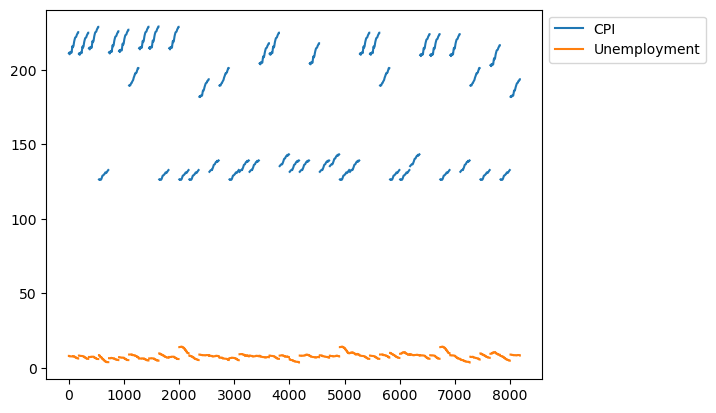

In [826]:
store[["CPI", "Unemployment"]].plot(kind="line", legend=(1, 2))
plt.legend(bbox_to_anchor=(1, 1))

In [827]:
store["CPI_interpolate"] = store["CPI"].interpolate(method="linear", limit_direction="both")
store["Unemployment_interpolate"] = store["Unemployment"].interpolate(method="linear", limit_direction="both")

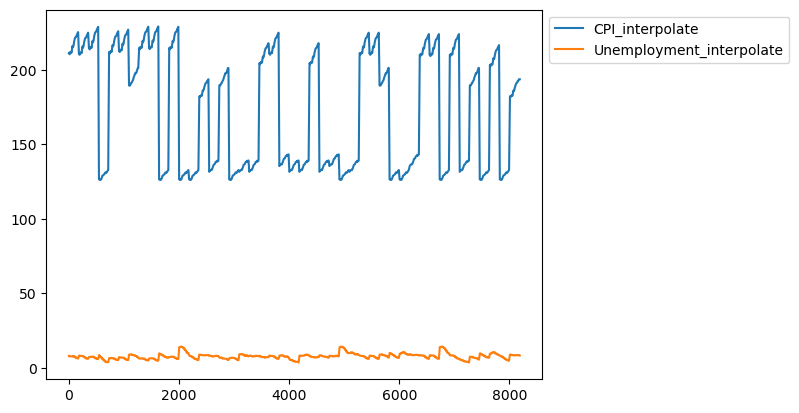

In [828]:
store[["CPI_interpolate", "Unemployment_interpolate"]].plot(kind="line", legend=(1, 2))
plt.legend(bbox_to_anchor=(1, 1))

In [829]:
# MarkDown의 결측치 비율 : 절반 이상, 제거 고려
store[["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]].isnull().mean()

MarkDown1    0.507692
MarkDown2    0.643346
MarkDown3    0.558852
MarkDown4    0.577045
MarkDown5    0.505495
dtype: float64

## Markdown fillna(0)

In [830]:
store[["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]] = store[["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]].fillna(0)

In [831]:
store = store.drop(["CPI", "Unemployment", "IsHoliday"], axis=1)
store.sample(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Type,Size,year,month,CPI_interpolate,Unemployment_interpolate
6810,38,2011-07-22,91.17,3.794,0.00,0.00,0.00,0.00,0.00,C,39690,2011,7,129.150774,13.503
7746,43,2012-01-20,52.72,3.268,320.80,24.36,31.72,0.00,153.04,C,41062,2012,1,211.499781,9.653
2661,15,2012-04-06,40.01,4.143,8567.95,0.00,46.32,1144.78,3518.73,B,123737,2012,4,137.797097,8.150
475,3,2012-03-23,66.53,3.787,737.08,36.10,1.43,92.11,583.90,B,37392,2012,3,224.790910,6.833
6953,39,2010-10-22,71.73,2.725,0.00,0.00,0.00,0.00,0.00,A,184109,2010,10,210.627144,8.476


## Scaling

In [832]:
store.select_dtypes("number").columns.tolist()

['Store',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'Size',
 'year',
 'month',
 'CPI_interpolate',
 'Unemployment_interpolate']

In [833]:
store_num = store[['Temperature', 'Fuel_Price', 'Size', 
                   'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
                   'CPI_interpolate', 'Unemployment_interpolate']]

In [834]:
store_num.head()

,Temperature,Fuel_Price,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI_interpolate,Unemployment_interpolate
0,42.31,2.572,151315,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,38.51,2.548,151315,0.0,0.0,0.0,0.0,0.0,211.242170,8.106
2,39.93,2.514,151315,0.0,0.0,0.0,0.0,0.0,211.289143,8.106
3,46.63,2.561,151315,0.0,0.0,0.0,0.0,0.0,211.319643,8.106
4,46.50,2.625,151315,0.0,0.0,0.0,0.0,0.0,211.350143,8.106


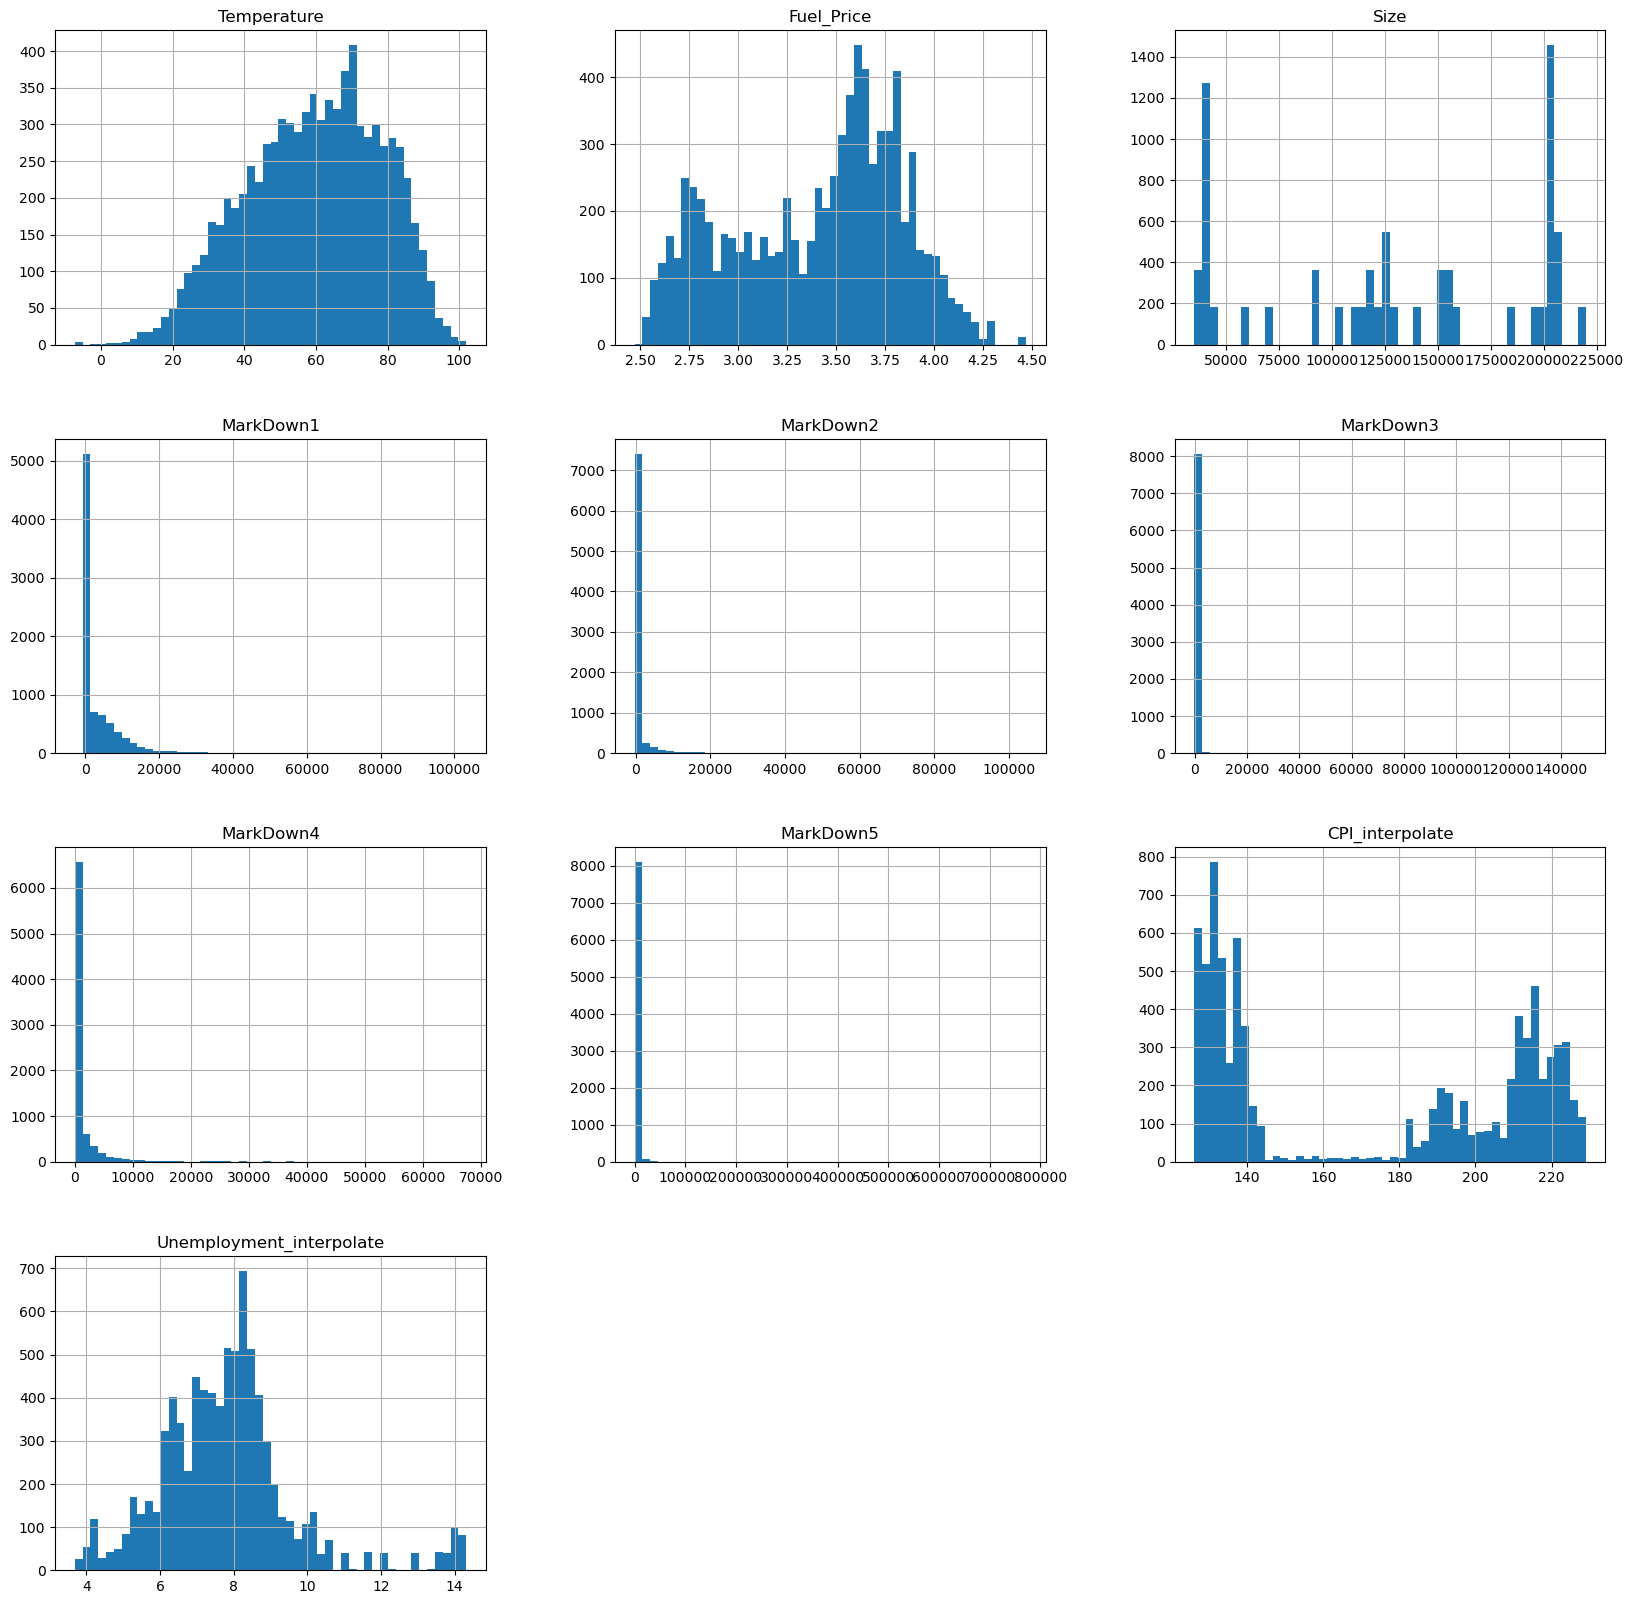

In [835]:
store_num.hist(figsize=(20, 20), bins=50);

In [836]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

mm = MinMaxScaler()
ss = StandardScaler()
rbs = RobustScaler()
store_num_scaled = rbs.fit_transform(store_num)

In [837]:
store_num_scaled

array([[-0.65767134, -1.34045584,  0.18848124, ...,  0.        ,
         0.35732923,  0.15625   ],
       [-0.79349477, -1.37464387,  0.18848124, ...,  0.        ,
         0.35912868,  0.15625   ],
       [-0.7427397 , -1.42307692,  0.18848124, ...,  0.        ,
         0.35970837,  0.15625   ],
       ...,
       [ 0.66696453,  0.14387464, -0.06300439, ...,  0.80228482,
         0.14127629,  0.27552083],
       [ 0.79099276,  0.31908832, -0.06300439, ...,  0.39527739,
         0.14127629,  0.27552083],
       [ 0.54865517,  0.41452991, -0.06300439, ...,  0.6956585 ,
         0.14127629,  0.27552083]])

In [838]:
store_num_scaled = pd.DataFrame(store_num_scaled, 
                                columns=['Temperature', 'Fuel_Price', 'Size', 
                                         'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 
                                         'MarkDown5', 'CPI_interpolate', 
                                         'Unemployment_interpolate'])

In [839]:
store_num_scaled.sample(5)

,Temperature,Fuel_Price,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI_interpolate,Unemployment_interpolate
1051,0.320615,0.115385,0.577481,0.318229,0.000000,0.127993,0.040429,1.522433,0.529531,-1.290104
3492,0.013225,-1.148148,0.586881,0.000000,0.000000,0.000000,0.000000,0.000000,0.280677,-0.167708
2348,-0.679117,0.007123,0.707555,1.815587,0.000000,42.049133,0.201628,1.731224,-0.611493,-1.267708
338,-0.213028,-0.383191,0.575976,2.818981,16.655036,22.510322,16.426324,1.866489,0.514958,-0.817187
216,0.304888,-1.296296,0.575976,0.000000,0.000000,0.000000,0.000000,0.000000,0.360211,0.185938


In [840]:
# 정규화 값으로 대치
store[['Temperature', 'Fuel_Price', 'Size', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 
       'CPI_interpolate', 'Unemployment_interpolate']] = store_num_scaled

In [841]:
store

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Type,Size,year,month,CPI_interpolate,Unemployment_interpolate
0,1,2010-02-05,-0.657671,-1.340456,0.000000,0.000000,0.000000,0.000000,0.000000,A,0.188481,2010,2,0.357329,0.156250
1,1,2010-02-12,-0.793495,-1.374644,0.000000,0.000000,0.000000,0.000000,0.000000,A,0.188481,2010,2,0.359129,0.156250
2,1,2010-02-19,-0.742740,-1.423077,0.000000,0.000000,0.000000,0.000000,0.000000,A,0.188481,2010,2,0.359708,0.156250
3,1,2010-02-26,-0.503262,-1.356125,0.000000,0.000000,0.000000,0.000000,0.000000,A,0.188481,2010,2,0.360085,0.156250
4,1,2010-03-05,-0.507908,-1.264957,0.000000,0.000000,0.000000,0.000000,0.000000,A,0.188481,2010,3,0.360461,0.156250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,0.548298,0.179487,1.043690,9.889745,0.123865,3.162506,1.182590,B,-0.063004,2013,6,0.141276,0.275521
8186,45,2013-07-05,0.600125,0.143875,1.959330,23.010244,24.060281,7.483576,0.565210,B,-0.063004,2013,7,0.141276,0.275521
8187,45,2013-07-12,0.666965,0.143875,0.816870,18.534436,3.539224,0.961465,0.802285,B,-0.063004,2013,7,0.141276,0.275521
8188,45,2013-07-19,0.790993,0.319088,0.638309,10.620448,8.430636,0.468573,0.395277,B,-0.063004,2013,7,0.141276,0.275521


In [842]:
store.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,year,month,CPI_interpolate,Unemployment_interpolate
count,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000
mean,23.000000,-0.048389,-0.152433,0.746207,12.242435,32.058803,1.797827,0.762380,0.028691,2011.351648,6.291209,-0.119287,0.005078
std,12.987966,0.667630,0.614440,1.592581,55.741516,311.311055,6.076103,3.518726,0.479627,1.041762,3.328046,0.484126,0.964027
min,1.000000,-2.430525,-1.482906,-0.599504,-2.695608,-7.401321,0.000000,-0.069086,-0.696362,2010.000000,1.000000,-0.692047,-2.146875
25%,12.000000,-0.529265,-0.672365,0.000000,0.000000,0.000000,0.000000,0.000000,-0.424024,2010.000000,3.000000,-0.612049,-0.610417
50%,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,6.000000,0.000000,0.000000
75%,34.000000,0.470735,0.327635,1.000000,1.000000,1.000000,1.000000,1.000000,0.575976,2012.000000,9.000000,0.387951,0.389583
max,45.000000,1.474042,1.360399,22.240131,1060.143422,6171.895541,87.098881,287.822087,0.707555,2013.000000,12.000000,0.577986,3.389063


# train, test.merge(store)

In [843]:
print(train.shape)
train.head()

(421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [844]:
train["Date"] = pd.to_datetime(train["Date"])
test["Date"] = pd.to_datetime(test["Date"])

In [845]:
print(store.shape)
store.head()

(8190, 15)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Type,Size,year,month,CPI_interpolate,Unemployment_interpolate
0,1,2010-02-05,-0.657671,-1.340456,0.0,0.0,0.0,0.0,0.0,A,0.188481,2010,2,0.357329,0.15625
1,1,2010-02-12,-0.793495,-1.374644,0.0,0.0,0.0,0.0,0.0,A,0.188481,2010,2,0.359129,0.15625
2,1,2010-02-19,-0.742740,-1.423077,0.0,0.0,0.0,0.0,0.0,A,0.188481,2010,2,0.359708,0.15625
3,1,2010-02-26,-0.503262,-1.356125,0.0,0.0,0.0,0.0,0.0,A,0.188481,2010,2,0.360085,0.15625
4,1,2010-03-05,-0.507908,-1.264957,0.0,0.0,0.0,0.0,0.0,A,0.188481,2010,3,0.360461,0.15625


In [846]:
train = train.merge(store, on=["Store", "Date"])

In [847]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Type,Size,year,month,CPI_interpolate,Unemployment_interpolate
0,1,1,2010-02-05,24924.50,False,-0.657671,-1.340456,0.000000,0.000000,0.000000,0.00000,0.000000,A,0.188481,2010,2,0.357329,0.156250
1,1,2,2010-02-05,50605.27,False,-0.657671,-1.340456,0.000000,0.000000,0.000000,0.00000,0.000000,A,0.188481,2010,2,0.357329,0.156250
2,1,3,2010-02-05,13740.12,False,-0.657671,-1.340456,0.000000,0.000000,0.000000,0.00000,0.000000,A,0.188481,2010,2,0.357329,0.156250
3,1,4,2010-02-05,39954.04,False,-0.657671,-1.340456,0.000000,0.000000,0.000000,0.00000,0.000000,A,0.188481,2010,2,0.357329,0.156250
4,1,5,2010-02-05,32229.38,False,-0.657671,-1.340456,0.000000,0.000000,0.000000,0.00000,0.000000,A,0.188481,2010,2,0.357329,0.156250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,-0.066482,0.525641,0.866222,0.589106,4.128819,0.27358,0.320237,B,-0.063004,2012,10,0.125475,0.448437
421566,45,94,2012-10-26,5203.31,False,-0.066482,0.525641,0.866222,0.589106,4.128819,0.27358,0.320237,B,-0.063004,2012,10,0.125475,0.448437
421567,45,95,2012-10-26,56017.47,False,-0.066482,0.525641,0.866222,0.589106,4.128819,0.27358,0.320237,B,-0.063004,2012,10,0.125475,0.448437
421568,45,97,2012-10-26,6817.48,False,-0.066482,0.525641,0.866222,0.589106,4.128819,0.27358,0.320237,B,-0.063004,2012,10,0.125475,0.448437


In [848]:
test = test.merge(store, on=["Store", "Date"])
test

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Type,Size,year,month,CPI_interpolate,Unemployment_interpolate
0,1,1,2012-11-02,False,-0.192655,-0.180912,1.458415,52.213206,2.098266,4.698509,1.021313,A,0.188481,2012,11,0.509942,-0.642187
1,1,2,2012-11-02,False,-0.192655,-0.180912,1.458415,52.213206,2.098266,4.698509,1.021313,A,0.188481,2012,11,0.509942,-0.642187
2,1,3,2012-11-02,False,-0.192655,-0.180912,1.458415,52.213206,2.098266,4.698509,1.021313,A,0.188481,2012,11,0.509942,-0.642187
3,1,4,2012-11-02,False,-0.192655,-0.180912,1.458415,52.213206,2.098266,4.698509,1.021313,A,0.188481,2012,11,0.509942,-0.642187
4,1,5,2012-11-02,False,-0.192655,-0.180912,1.458415,52.213206,2.098266,4.698509,1.021313,A,0.188481,2012,11,0.509942,-0.642187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,93,2013-07-26,False,0.548655,0.414530,0.045698,8.639111,0.085054,0.014044,0.695659,B,-0.063004,2013,7,0.141276,0.275521
115060,45,94,2013-07-26,False,0.548655,0.414530,0.045698,8.639111,0.085054,0.014044,0.695659,B,-0.063004,2013,7,0.141276,0.275521
115061,45,95,2013-07-26,False,0.548655,0.414530,0.045698,8.639111,0.085054,0.014044,0.695659,B,-0.063004,2013,7,0.141276,0.275521
115062,45,97,2013-07-26,False,0.548655,0.414530,0.045698,8.639111,0.085054,0.014044,0.695659,B,-0.063004,2013,7,0.141276,0.275521


# OneHotEncoding : Type

In [897]:
train_type_ohe = pd.get_dummies(train["Type"])
train_type_ohe.sample(5)

,A,B,C
7115,1,0,0
387890,1,0,0
353278,0,0,1
269778,1,0,0
129329,1,0,0


In [898]:
test_type_ohe = pd.get_dummies(test["Type"])
test_type_ohe.sample(5)

,A,B,C
81970,1,0,0
29791,0,1,0
101905,1,0,0
72026,1,0,0
44633,0,1,0


In [851]:
train = pd.concat([train, train_type_ohe], axis=1)

In [852]:
test = pd.concat([test, test_type_ohe], axis=1)

In [853]:
train[["Store", "A", "B", "C"]].sample(5)

,Store,A,B,C
141364,15,0,1,0
369651,39,1,0,0
243285,25,0,1,0
228616,24,1,0,0
319748,33,1,0,0


In [854]:
test[["Store", "A", "B", "C"]].sample(5)

,Store,A,B,C
30629,12,0,1,0
32302,13,1,0,0
56561,22,0,1,0
14865,6,1,0,0
84050,32,1,0,0


# 시각화

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

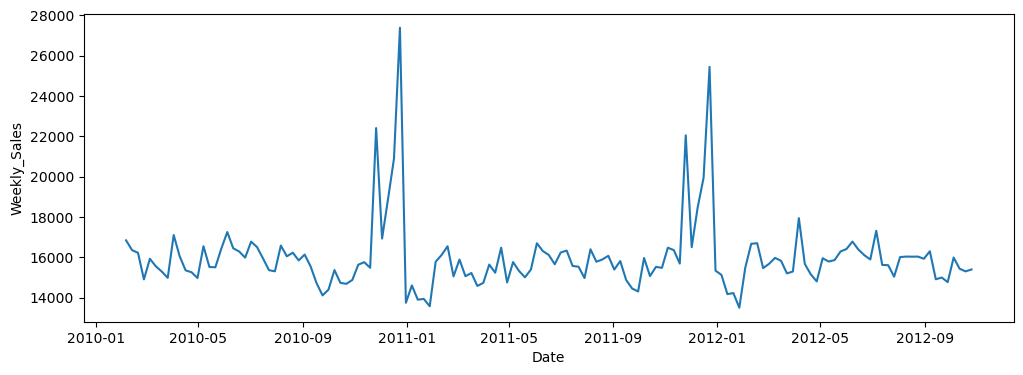

In [855]:
# 기간별 매출 추이
# 크리스마스 ~ 연말 시즌 2배 가까이 상승하는 것을 볼 수 있음
plt.figure(figsize=(12, 4))
sns.lineplot(data=train, x="Date", y="Weekly_Sales", ci=None)

<AxesSubplot:xlabel='month', ylabel='Weekly_Sales'>

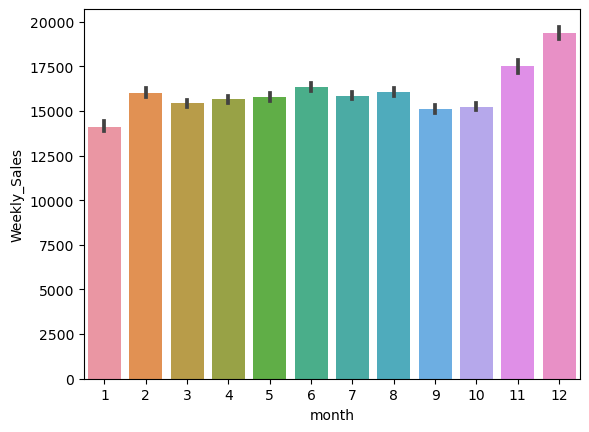

In [856]:
sns.barplot(data=train, x="month", y="Weekly_Sales")

<AxesSubplot:xlabel='year', ylabel='Weekly_Sales'>

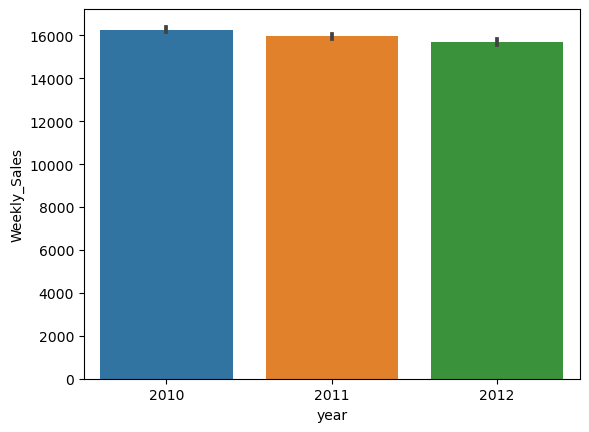

In [857]:
sns.barplot(data=train, x="year", y="Weekly_Sales")

<AxesSubplot:xlabel='IsHoliday', ylabel='Weekly_Sales'>

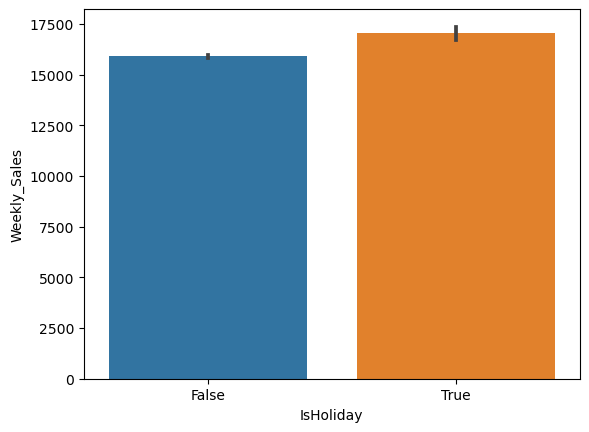

In [858]:
# 휴일 여부에 따른 매출은 큰 차이를 보이지 않음
sns.barplot(data=train, x="IsHoliday", y="Weekly_Sales")

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

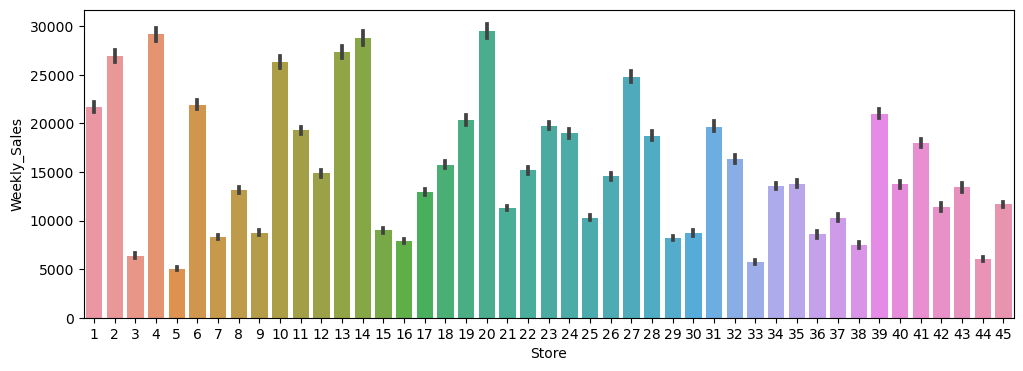

In [859]:
plt.figure(figsize=(12, 4))
sns.barplot(data=train, x="Store", y="Weekly_Sales")

<AxesSubplot:xlabel='Type', ylabel='Weekly_Sales'>

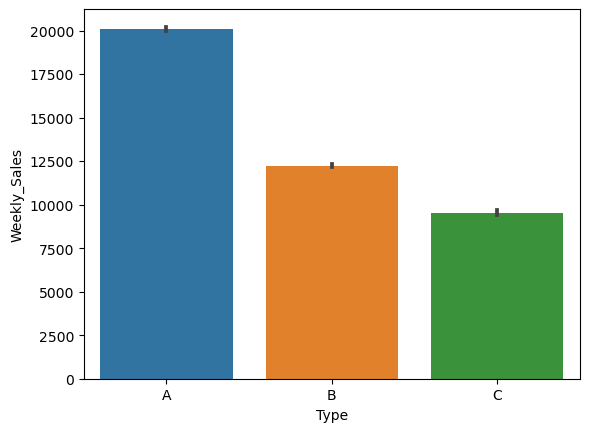

In [860]:
# Type of Store (A, B, C)
# 알파벳 순으로 매출이 높음
sns.barplot(data=train, x="Type", y="Weekly_Sales")

<AxesSubplot:xlabel='Temperature', ylabel='Weekly_Sales'>

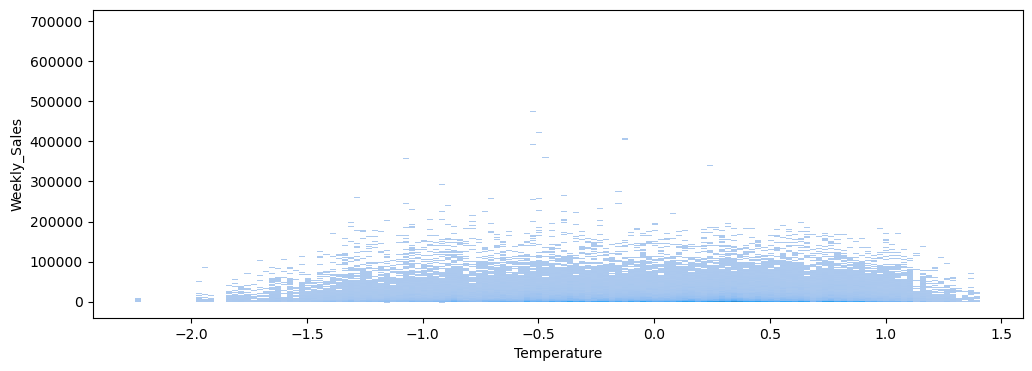

In [861]:
plt.figure(figsize=(12, 4))
sns.histplot(data=train, x="Temperature", y="Weekly_Sales")

<AxesSubplot:xlabel='Fuel_Price', ylabel='Weekly_Sales'>

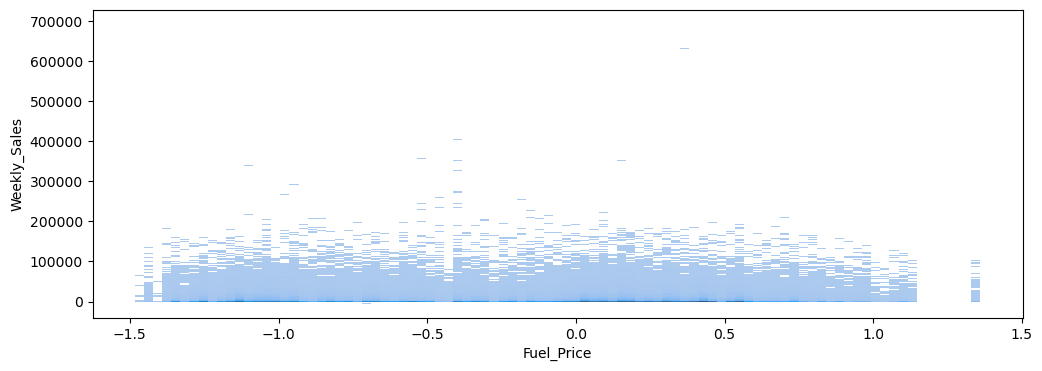

In [862]:
plt.figure(figsize=(12, 4))
sns.histplot(data=train, x="Fuel_Price", y="Weekly_Sales")

<AxesSubplot:xlabel='Size', ylabel='Weekly_Sales'>

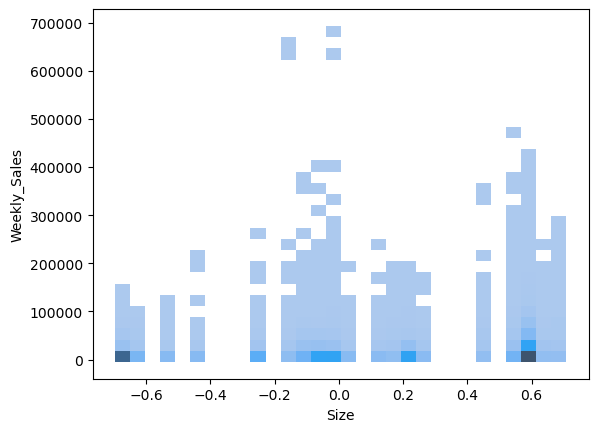

In [863]:
sns.histplot(data=train, x="Size", y="Weekly_Sales", bins=30)

<AxesSubplot:xlabel='CPI_interpolate', ylabel='Weekly_Sales'>

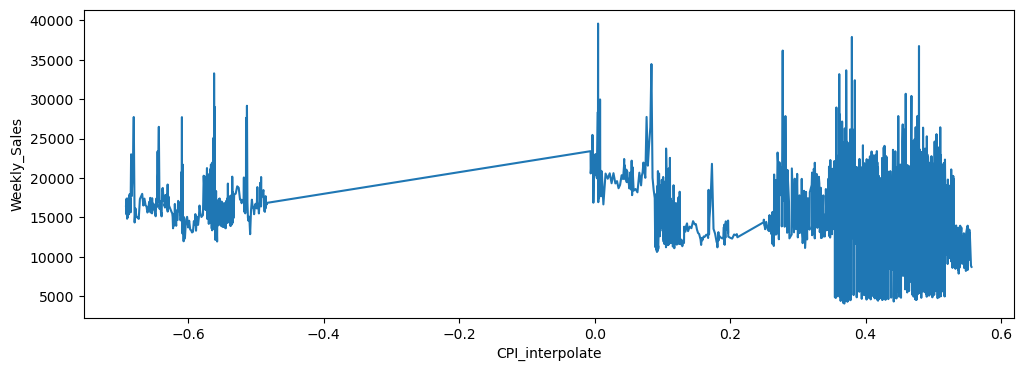

In [864]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=train, x="CPI_interpolate", y="Weekly_Sales", ci=None)

<AxesSubplot:xlabel='Unemployment_interpolate', ylabel='Weekly_Sales'>

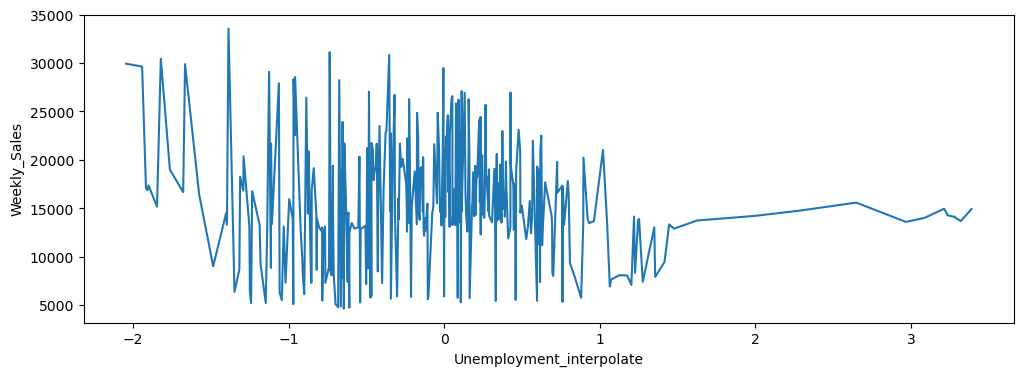

In [865]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=train, x="Unemployment_interpolate", y="Weekly_Sales", ci=None)

# X, y split

In [866]:
label = "Weekly_Sales"

In [867]:
features = train.columns.tolist()
features

['Store',
 'Dept',
 'Date',
 'Weekly_Sales',
 'IsHoliday',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'Type',
 'Size',
 'year',
 'month',
 'CPI_interpolate',
 'Unemployment_interpolate',
 'A',
 'B',
 'C']

In [868]:
features = ['Store',
            'Dept',
#             'Date',
#             'Weekly_Sales',
            'IsHoliday',
            'Temperature',
            'Fuel_Price', 
            'MarkDown1', 
            'MarkDown2', 
            'MarkDown3', 
            'MarkDown4', 
            'MarkDown5',
#             'Type',
            'Size',
            'CPI_interpolate',
            'Unemployment_interpolate',
            'year',
            'month',
            'A',
            'B',
            'C']

In [869]:
X_train = train[features]
print(X_train.shape)
X_train.head()

(421570, 18)


,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,CPI_interpolate,Unemployment_interpolate,year,month,A,B,C
0,1,1,False,-0.657671,-1.340456,0.0,0.0,0.0,0.0,0.0,0.188481,0.357329,0.15625,2010,2,1,0,0
1,1,2,False,-0.657671,-1.340456,0.0,0.0,0.0,0.0,0.0,0.188481,0.357329,0.15625,2010,2,1,0,0
2,1,3,False,-0.657671,-1.340456,0.0,0.0,0.0,0.0,0.0,0.188481,0.357329,0.15625,2010,2,1,0,0
3,1,4,False,-0.657671,-1.340456,0.0,0.0,0.0,0.0,0.0,0.188481,0.357329,0.15625,2010,2,1,0,0
4,1,5,False,-0.657671,-1.340456,0.0,0.0,0.0,0.0,0.0,0.188481,0.357329,0.15625,2010,2,1,0,0


In [870]:
y_train = train[label]
print(y_train.shape)
y_train.head()

(421570,)


0    24924.50
1    50605.27
2    13740.12
3    39954.04
4    32229.38
Name: Weekly_Sales, dtype: float64

In [871]:
X_test = test[features]
print(X_test.shape)
X_test.head()

(115064, 18)


,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,CPI_interpolate,Unemployment_interpolate,year,month,A,B,C
0,1,1,False,-0.192655,-0.180912,1.458415,52.213206,2.098266,4.698509,1.021313,0.188481,0.509942,-0.642187,2012,11,1,0,0
1,1,2,False,-0.192655,-0.180912,1.458415,52.213206,2.098266,4.698509,1.021313,0.188481,0.509942,-0.642187,2012,11,1,0,0
2,1,3,False,-0.192655,-0.180912,1.458415,52.213206,2.098266,4.698509,1.021313,0.188481,0.509942,-0.642187,2012,11,1,0,0
3,1,4,False,-0.192655,-0.180912,1.458415,52.213206,2.098266,4.698509,1.021313,0.188481,0.509942,-0.642187,2012,11,1,0,0
4,1,5,False,-0.192655,-0.180912,1.458415,52.213206,2.098266,4.698509,1.021313,0.188481,0.509942,-0.642187,2012,11,1,0,0


In [872]:
# log1p[label]
y_train.describe()

count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

In [873]:
y_train

0         24924.50
1         50605.27
2         13740.12
3         39954.04
4         32229.38
            ...   
421565     2487.80
421566     5203.31
421567    56017.47
421568     6817.48
421569     1076.80
Name: Weekly_Sales, Length: 421570, dtype: float64

In [874]:
y_train = y_train + 5000

In [875]:
y_train.describe()

count    421570.000000
mean      20981.258123
std       22711.183519
min          11.060000
25%        7079.650000
50%       12612.030000
75%       25205.852500
max      698099.360000
Name: Weekly_Sales, dtype: float64

In [876]:
y_train = np.log1p(y_train)
y_train[:5]

0    10.306466
1    10.926051
2     9.838475
3    10.713418
4    10.524880
Name: Weekly_Sales, dtype: float64

In [877]:
y_train.describe()

count    421570.000000
mean          9.571638
std           0.821664
min           2.489894
25%           8.865121
50%           9.442486
75%          10.134871
max          13.456118
Name: Weekly_Sales, dtype: float64

# Model

## RandomForest

In [878]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=500, random_state=42, max_depth=13, max_features=0.8, n_jobs=-1)

In [879]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=13, max_features=0.8, n_estimators=500,
                      n_jobs=-1, random_state=42)

In [880]:
y_pred_rf = rf.predict(X_test)
y_pred_rf[:5]

array([10.17504167, 10.83805174,  9.65612901, 10.52747293, 10.44247082])

# Score

In [881]:
from sklearn.model_selection import cross_val_predict

y_valid_pred = cross_val_predict(rf, X_train, y_train, cv=5, n_jobs=-1, verbose=2)
y_valid_pred[:5]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  5.4min remaining:  8.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.6min finished


array([10.2356557 , 10.65385042,  9.91408334, 10.51346732, 10.56002241])

<AxesSubplot:xlabel='Weekly_Sales'>

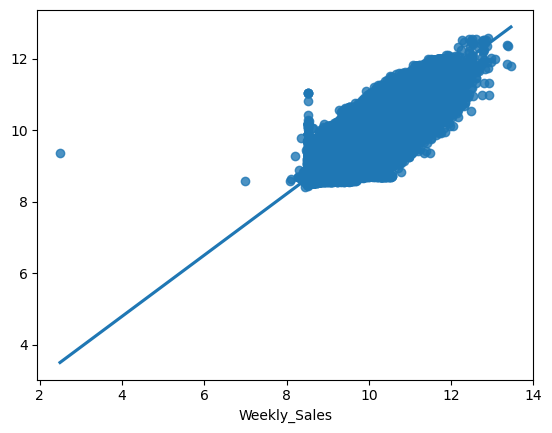

In [882]:
sns.regplot(x=y_train, y=y_valid_pred)

<AxesSubplot:xlabel='Weekly_Sales'>

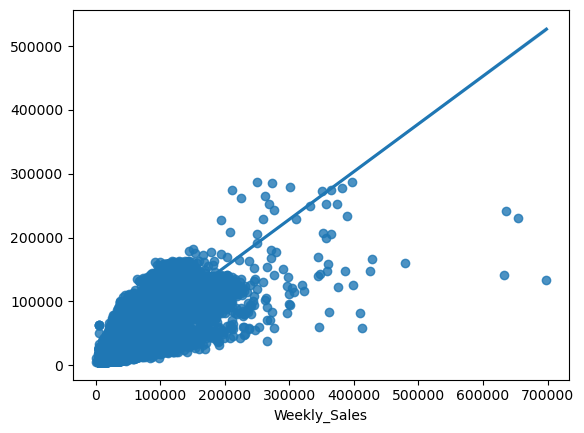

In [883]:
sns.regplot(x=np.expm1(y_train), y=np.expm1(y_valid_pred))

In [884]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, y_valid_pred)

0.09487756540944206

## LGBM

In [885]:
import lightgbm as lgb

lgbm = lgb.LGBMRegressor()

In [886]:
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [887]:
y_pred_lg = lgbm.predict(X_test)
y_pred_lg[:5]

array([10.23377358, 10.83225278,  9.79443096, 10.40834502, 10.45248401])

In [888]:
y_valid_pred = cross_val_predict(lgbm, X_train, y_train, cv=5, n_jobs=-1, verbose=2)
y_valid_pred[:5]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.1s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.2s finished


array([10.12125513, 10.6535822 ,  9.72284743, 10.28238193, 10.15377567])

<AxesSubplot:xlabel='Weekly_Sales'>

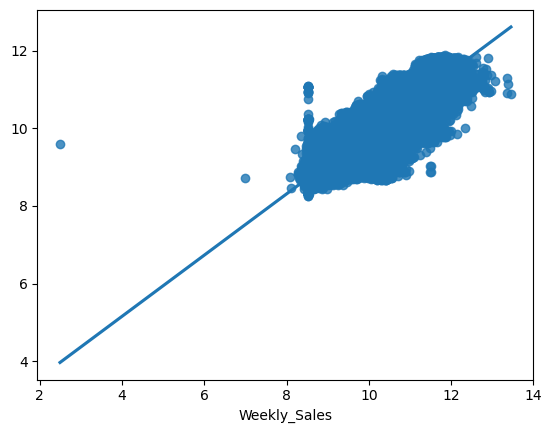

In [889]:
sns.regplot(x=y_train, y=y_valid_pred)

In [890]:
cond = y_train < 4
y_train[cond]

269456    2.489894
Name: Weekly_Sales, dtype: float64

In [891]:
mean_squared_error(y_train, y_valid_pred)

0.11157093267791472

# 제출

In [892]:
submit = pd.read_csv("../data/MiniP4/sampleSubmission.csv.zip")
submit.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


In [893]:
y_pred_rf = np.expm1(y_pred_rf)
y_pred_rf[:5]

array([26239.0373971 , 50921.07169097, 15616.21349018, 37326.02690077,
       34284.26064751])

In [894]:
submit["Weekly_Sales"] = y_pred_rf
submit.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,26239.037397
1,1_1_2012-11-09,50921.071691
2,1_1_2012-11-16,15616.213490
3,1_1_2012-11-23,37326.026901
4,1_1_2012-11-30,34284.260648


In [895]:
submit.to_csv("../data/MiniP4/submit.csv", index=False)

In [896]:
pd.read_csv("../data/MiniP4/submit.csv")

,Id,Weekly_Sales
0,1_1_2012-11-02,26239.037397
1,1_1_2012-11-09,50921.071691
2,1_1_2012-11-16,15616.213490
3,1_1_2012-11-23,37326.026901
4,1_1_2012-11-30,34284.260648
...,...,...
115059,45_98_2013-06-28,8516.223739
115060,45_98_2013-07-05,8785.771805
115061,45_98_2013-07-12,62023.755439
115062,45_98_2013-07-19,11321.178882
